In [3]:
#  Data prepare: 15 classes each one about 1000 images for quick check 
# VGG data prepare

import pandas as pd
import numpy as np
import csv
import json
import random
import matplotlib.pyplot as plt
import os,sys
import numpy as np
import scipy
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
import random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import os,sys
import numpy as np
import scipy
from scipy import ndimage
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from PIL import Image
import random
import numpy as np
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
train_file = '/home/zxt/code/S10.json'
with open(train_file) as data_file:
    train_anns=json.load(data_file)

get all the images names in picked_data folder

In [5]:
import os
import os.path
rootdir = "/home/zxt/data/picked_data"
img_list = []
for parent, dirnames, filenames in os.walk(rootdir):
    for filename in filenames:
        img_list.append(filename)
len(img_list)

13950

In [6]:
img_list[:2]

['S10_J09_R1_IMAG0196.JPG', 'S10_O11_R1_IMAG0126.JPG']

In [7]:
num = 0 
for i in train_anns['annotations']:
    if num <5:
        i_new =  i['image_id'] +'.JPG'
        i_new = i_new[15:]
        print(i_new)
        num +=1

S10_B03_R1_IMAG0001.JPG
S10_B03_R1_IMAG0002.JPG
S10_B03_R1_IMAG0003.JPG
S10_B03_R1_IMAG0004.JPG
S10_B03_R1_IMAG0005.JPG


In [8]:
label_dict = {}
for i in train_anns['annotations']:
    i_new = i['image_id'] + '.JPG'
    i_new = i_new[15:]
    if i_new in img_list:
        label_dict[i_new]=i['category_id']
        

In [9]:
df = pd.DataFrame.from_dict(label_dict,orient='index',columns=['label'])
df = df.reset_index().rename(columns={'index':'image_id'})
print(df.head())

                  image_id  label
0  S10_B03_R1_IMAG0108.JPG     11
1  S10_B03_R1_IMAG0110.JPG     11
2  S10_B03_R1_IMAG0111.JPG     11
3  S10_B03_R1_IMAG0115.JPG     11
4  S10_B03_R1_IMAG0188.JPG     15


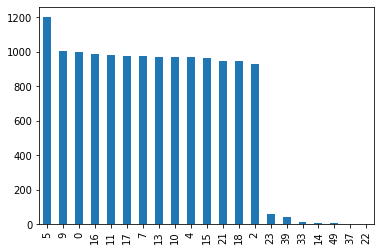

In [10]:
df['label'].value_counts().plot.bar()
plt.show()

In [11]:
df.label.unique()

array([11, 15,  0,  5, 18, 21,  9, 13, 10,  4, 17, 16, 23,  2,  7, 49, 22,
       39, 33, 14, 37])

In [12]:
df.loc[df.label == 39, 'label']=21

delete the uneccesary lables:

In [13]:
need_label = [18,5,7,15,11,10,9,13,0,16,17,2,21,4]

In [14]:
len(df)

13950

In [15]:
df1 = df[df.label.isin(need_label)]

In [16]:
len(df1)

13871

In [15]:
df.head()

,image_id,label
0,S10_B03_R1_IMAG0108.JPG,11
1,S10_B03_R1_IMAG0110.JPG,11
2,S10_B03_R1_IMAG0111.JPG,11
3,S10_B03_R1_IMAG0115.JPG,11
4,S10_B03_R1_IMAG0188.JPG,15


In [16]:
len(df1)

13871

In [17]:
df1.head()

,image_id,label
0,S10_B03_R1_IMAG0108.JPG,11
1,S10_B03_R1_IMAG0110.JPG,11
2,S10_B03_R1_IMAG0111.JPG,11
3,S10_B03_R1_IMAG0115.JPG,11
4,S10_B03_R1_IMAG0188.JPG,15


In [17]:
df1.loc[df1.label == 18, 'label']='0'
df1.loc[df1.label == 5, 'label']='1'
df1.loc[df1.label == 7, 'label']='2'
df1.loc[df1.label == 15, 'label']='3'
df1.loc[df1.label == 11, 'label']='4'
df1.loc[df1.label == 10, 'label']='5'
df1.loc[df1.label == 9, 'label']='6'
df1.loc[df1.label == 13, 'label']='7'
df1.loc[df1.label == 0, 'label']='8'
df1.loc[df1.label == 16, 'label']='9'
df1.loc[df1.label == 17, 'label']='10'
df1.loc[df1.label == 2, 'label']='11'
df1.loc[df1.label == 21, 'label']='12'
df1.loc[df1.label == 4, 'label']='13'

/home/zxt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/zxt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/zxt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/index

In [18]:
df1.head()

,image_id,label
0,S10_B03_R1_IMAG0108.JPG,4
1,S10_B03_R1_IMAG0110.JPG,4
2,S10_B03_R1_IMAG0111.JPG,4
3,S10_B03_R1_IMAG0115.JPG,4
4,S10_B03_R1_IMAG0188.JPG,3


In [19]:
df.head()

,image_id,label
0,S10_B03_R1_IMAG0108.JPG,11
1,S10_B03_R1_IMAG0110.JPG,11
2,S10_B03_R1_IMAG0111.JPG,11
3,S10_B03_R1_IMAG0115.JPG,11
4,S10_B03_R1_IMAG0188.JPG,15


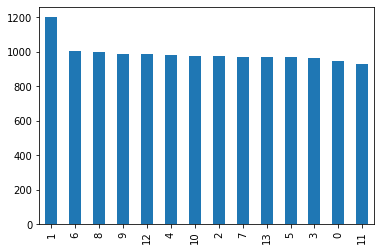

In [20]:
df1['label'].value_counts().plot.bar()
plt.show()

split train, validate, test datasets

In [22]:
train_df, validate0_df = train_test_split(df1, test_size=0.30, random_state=523)
train_df = train_df.reset_index(drop=True)
validate0_df = validate0_df.reset_index(drop=True)

In [23]:
validate_df, test_df = train_test_split(validate0_df, test_size=0.30, random_state=912)
validate_df = validate_df.reset_index(drop=True)
test_df = test_df.reset_index(drop=True)

In [24]:
len(train_df)

9709

In [25]:
len(validate_df)

2913

In [26]:
len(test_df)

1249

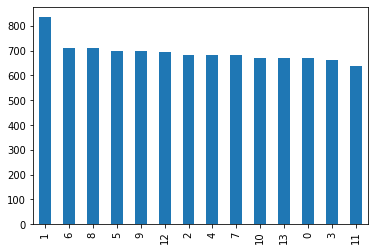

In [27]:
train_df['label'].value_counts().plot.bar()
plt.show()

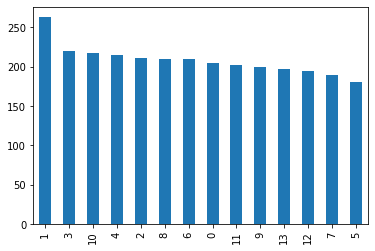

In [28]:
validate_df['label'].value_counts().plot.bar()
plt.show()

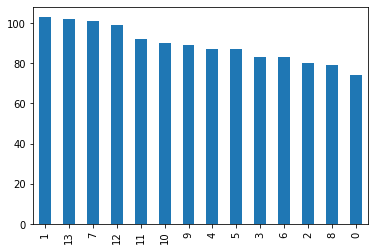

In [29]:
test_df['label'].value_counts().plot.bar()
plt.show()

In [30]:
imglist = train_df['image_id'].tolist()

In [31]:
X_train = np.empty((len(imglist),227,227,3))

In [32]:
Y_train = np.empty((len(imglist),1))

In [33]:
X_train.shape

(9709, 227, 227, 3)

In [34]:
Y_train.shape

(9709, 1)

In [35]:
path = '/home/zxt/data/picked_data/'

change to pixel image:

In [36]:
count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(227,227))
        X_train[count]=img
        count+=1
    except:
        nonelist.append(img_path)

In [37]:
# check if there is any nonelist:
len(nonelist)

0

In [38]:
X_train[:2]

array([[[[254., 249., 253.],
         [254., 249., 253.],
         [254., 249., 253.],
         ...,
         [  4.,  18.,   3.],
         [  7.,  13.,   1.],
         [  7.,  13.,   1.]],

        [[254., 249., 253.],
         [254., 249., 253.],
         [254., 249., 253.],
         ...,
         [  5.,  17.,   3.],
         [  4.,  16.,   2.],
         [  5.,  15.,   4.]],

        [[254., 249., 253.],
         [254., 249., 253.],
         [254., 249., 253.],
         ...,
         [  4.,  16.,   2.],
         [  3.,  15.,   1.],
         [  3.,  15.,   3.]],

        ...,

        [[220., 220., 220.],
         [220., 220., 220.],
         [221., 221., 221.],
         ...,
         [220., 220., 220.],
         [220., 220., 220.],
         [225., 220., 226.]],

        [[220., 220., 220.],
         [220., 220., 220.],
         [220., 220., 220.],
         ...,
         [220., 220., 220.],
         [220., 220., 220.],
         [223., 221., 226.]],

        [[224., 220., 219.],
       

In [39]:
type(Y_train)

numpy.ndarray

In [40]:
d=np.array(Y_train)
Y_train=d.reshape(len(Y_train),1)
           

In [41]:
type(Y_train)

numpy.ndarray

In [42]:
Y_train

array([[ 6.90444846e-310],
       [ 6.90444846e-310],
       [ 4.64093315e-310],
       ...,
       [             nan],
       [             nan],
       [-1.25542154e+058]])

In [43]:
label = train_df['label']
Y_train = [i for i in label]
Y_train = np.array(Y_train)
Y_train = Y_train.reshape(len(Y_train),1)
Y_train.shape

(9709, 1)

In [44]:
train_df[:2]

,image_id,label
0,S10_J10_R3_IMAG1248.JPG,8
1,S10_L13_R3_IMAG0458.JPG,4


In [45]:
Y_train[:2]

array([['8'],
       ['4']], dtype='<U2')

X_validate, Y_validate Preparation:

In [46]:
validate_df.shape

(2913, 2)

In [47]:
validate_df.head()

,image_id,label
0,S10_C08_R1_IMAG0186.JPG,12
1,S10_D03_R2_IMAG0267.JPG,5
2,S10_E02_R1_IMAG1667.JPG,13
3,S10_D03_R1_IMAG0276.JPG,6
4,S10_I11_R1_IMAG0072.JPG,4


In [48]:
imglist = validate_df['image_id'].tolist()
X_validate = np.empty((len(imglist),227,227,3))
X_validate.shape

(2913, 227, 227, 3)

In [49]:
count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(227,227))
        X_validate[count]=img
        count+=1
    except:
        nonelist.append(img_path)

In [50]:
X_validate[:2]

array([[[[ 41.,  99., 149.],
         [ 54.,  99., 156.],
         [ 50.,  97., 153.],
         ...,
         [122., 163., 191.],
         [123., 167., 196.],
         [121., 165., 192.]],

        [[ 48.,  98., 149.],
         [ 43., 101., 149.],
         [ 46.,  99., 143.],
         ...,
         [121., 166., 195.],
         [124., 168., 197.],
         [124., 169., 198.]],

        [[ 41.,  99., 147.],
         [ 53., 100., 144.],
         [ 46., 100., 144.],
         ...,
         [123., 164., 192.],
         [123., 170., 196.],
         [126., 170., 197.]],

        ...,

        [[220., 220., 220.],
         [220., 220., 220.],
         [220., 220., 220.],
         ...,
         [220., 220., 220.],
         [220., 220., 220.],
         [220., 220., 220.]],

        [[220., 220., 220.],
         [220., 220., 220.],
         [220., 220., 220.],
         ...,
         [220., 220., 220.],
         [220., 220., 220.],
         [220., 220., 220.]],

        [[221., 221., 221.],
       

In [51]:
label = validate_df['label']
Y_validate = [i for i in label]
Y_validate = np.array(Y_validate)
Y_validate = Y_validate.reshape(len(Y_validate),1)
Y_validate.shape

(2913, 1)

In [52]:
Y_validate[:2]

array([['12'],
       ['5']], dtype='<U2')

In [53]:
validate_df[:2]

,image_id,label
0,S10_C08_R1_IMAG0186.JPG,12
1,S10_D03_R2_IMAG0267.JPG,5


test dataset preparation 

In [54]:
imglist = test_df['image_id'].tolist()
X_test = np.empty((len(imglist),227,227,3))
X_test.shape

(1249, 227, 227, 3)

In [55]:
count=0
nonelist=[]
for img_name in imglist:
    img_path = path + img_name
    try:
        img = image.load_img(img_path, target_size=(227,227))
        X_test[count]=img
        count+=1
    except:
        nonelist.append(img_path)

In [56]:
X_test.shape

(1249, 227, 227, 3)

In [57]:
X_test[:2]

array([[[[147., 191., 252.],
         [149., 191., 251.],
         [146., 190., 253.],
         ...,
         [ 32.,  79., 149.],
         [ 31.,  84., 152.],
         [ 36.,  83., 155.]],

        [[149., 193., 255.],
         [148., 192., 253.],
         [148., 194., 253.],
         ...,
         [ 34.,  79., 147.],
         [ 29.,  82., 148.],
         [ 30.,  78., 152.]],

        [[150., 194., 255.],
         [146., 195., 255.],
         [146., 196., 255.],
         ...,
         [ 35.,  74., 153.],
         [ 35.,  78., 157.],
         [ 24.,  83., 153.]],

        ...,

        [[220., 220., 220.],
         [220., 220., 220.],
         [220., 220., 220.],
         ...,
         [228., 228., 228.],
         [220., 220., 220.],
         [220., 220., 220.]],

        [[220., 220., 220.],
         [220., 220., 220.],
         [220., 220., 220.],
         ...,
         [220., 220., 220.],
         [220., 220., 220.],
         [220., 220., 220.]],

        [[220., 220., 220.],
       

In [58]:
label = test_df['label']
Y_test = [i for i in label]
Y_test = np.array(Y_test)
Y_test = Y_test.reshape(len(Y_test),1)
Y_test.shape

(1249, 1)

In [59]:
test_df[:2]

,image_id,label
0,S10_N08_R2_IMAG0811.JPG,2
1,S10_H02_R2_IMAG0465.JPG,3


In [60]:
Y_test[:2]

array([['2'],
       ['3']], dtype='<U2')

save the dataframe datasets into csv:

In [21]:
df1.to_csv(r'/home/zxt/data/df1.csv', index=False)

import the csv file into dataframe dataset:

In [1]:
csv_file = '/home/zxt/data/df1.csv'
csv_data = pd.read_csv(csv_file, low_memory=False) # prevent the warning message
csv_df = pd.DataFrame(csv_data)

NameError: name 'pd' is not defined

In [64]:
csv_df.shape

(13871, 3)

In [65]:
csv_df.head()

,Unnamed: 0,image_id,label
0,0,S10_B03_R1_IMAG0108.JPG,4
1,1,S10_B03_R1_IMAG0110.JPG,4
2,2,S10_B03_R1_IMAG0111.JPG,4
3,3,S10_B03_R1_IMAG0115.JPG,4
4,4,S10_B03_R1_IMAG0188.JPG,3


=====================modeling===================

In [78]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import keras
from keras.datasets import cifar10
import matplotlib
matplotlib.use('Agg')
import matplotlib.pyplot as plt
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import VGG16
import numpy as np


classes_num = 14
batch_size = 32
epochs_num = 10

In [ ]:
from keras.layers import Flatten,Dense,Dropout,Input
from keras.applications import VGG16
from keras.optimizers import SGD
from keras.models import Model 
from keras.utils import np_utils

print('[INFO] loading dataset......')
(x_train,y_train)=(X_train, Y_train)
(x_valid,y_valid)=(X_validate, Y_validate)

y_train=np_utils.to_categorical(y_train,14)
y_valid=np_utils.to_categorical(y_valid,14)
print('[INFO] initializing model......')
base_model=VGG16(weights='imagenet',include_top=False,input_tensor=Input(shape=(227,227,3)))

#??
head_model=base_model.output
head_model=Flatten(name="flatten")(head_model)
head_model = Dense(512, activation="relu")(head_model)
head_model = Dropout(0.5)(head_model)
head_model=Dense(64,activation='relu')(head_model)
head_model = Dense(14, activation="softmax")(head_model)
model=Model(base_model.input,head_model)

#?????5????????????????
for layer in base_model.layers:
    layer.trainable=False
print('[INFO] compiling model')
sgd=SGD(lr=0.0001,momentum=0.9)
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=sgd)
print('[INFO] training model')
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_valid,y_valid))
print('[INFO] saving model and weights')
#??????????
model_json=model.to_json()
open('model_architecture.json','w').write(model_json)
#????
model.save_weights('transfer_learning_weights_2.h5', overwrite=True)
model.save('fullmodel.h5')

[INFO] loading dataset......
[INFO] initializing model......
[INFO] compiling model
[INFO] training model
Train on 9709 samples, validate on 2913 samples
Epoch 1/10
9709/9709 [==============================] - 2111s 217ms/step - loss: 3.6225 - accuracy: 0.1522 - val_loss: 2.4528 - val_accuracy: 0.1658
Epoch 2/10
3168/9709 [========>.....................] - ETA: 18:08 - loss: 2.5060 - accuracy: 0.2049

In [92]:
Y_train.shape

(9709, 1)

In [93]:
Y_train

array([[ 6.90982211e-310],
       [ 6.90982211e-310],
       [ 4.64158638e-310],
       ...,
       [-1.43712449e+307],
       [-1.43712449e+307],
       [-1.43712449e+307]])

***************** Load model and continue train  *********************

In [76]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.applications.vgg16 import VGG16

In [77]:
model  = VGG16()
model.load_weights('/home/zxt/code/transfer_learning_weights.h5')

ValueError: Shapes (25088, 4096) and (25088, 512) are incompatible

continue train:


In [ ]:
model.fit(x_train, y_train, batch_size=64,epochs=2,validation_data=(x_valid,y_valid))